In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/content/car.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [13]:
# Independent variable
X = df.iloc[:, :-1].values

# Dependent Variable
y = df.iloc[:, -1].values

In [14]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the kernel SVM model on the training set

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train);

## Predicting new result

In [24]:
new_predict = sc.transform([[40, 160000]])
print(classifier.predict(new_predict))

[1]


## Predicting test set result

In [25]:
np.set_printoptions(suppress=True)
print(np.concatenate( (sc.inverse_transform(X_test), y_test.reshape(len(y_test), 1) ), 1 ))


[[-0.79895082  0.49460758  0.        ]
 [-0.02126485 -0.57735906  0.        ]
 [-0.31289709  0.14694273  0.        ]
 [-0.79895082  0.26283101  0.        ]
 [-0.31289709 -0.57735906  0.        ]
 [-1.09058306 -1.44652121  0.        ]
 [-0.70174008 -1.59138156  0.        ]
 [-0.21568634  2.14601566  1.        ]
 [-1.96547978 -0.05586178  0.        ]
 [ 0.85363187 -0.78016356  0.        ]
 [-0.79895082 -0.60633113  0.        ]
 [-0.99337231 -0.4324987   0.        ]
 [-0.1184756  -0.4324987   0.        ]
 [ 0.0759459   0.20488687  0.        ]
 [-1.77105829  0.46563551  0.        ]
 [-0.60452933  1.36376973  0.        ]
 [-0.1184756   0.20488687  0.        ]
 [-1.86826903  0.43666344  0.        ]
 [ 1.63131784  1.74040666  1.        ]
 [-0.31289709 -1.38857706  0.        ]
 [-0.31289709 -0.66427528  0.        ]
 [ 0.85363187  2.14601566  1.        ]
 [ 0.27036739 -0.54838699  0.        ]
 [ 0.85363187  1.01610487  1.        ]
 [-1.47942605 -1.21474464  0.        ]
 [ 1.04805336  2.05909944

In [26]:
y_pred = classifier.predict(X_test)

orginal_data = np.concatenate( (sc.inverse_transform(X_test), y_test.reshape(len(y_test), 1) ), 1 )

print(np.concatenate((orginal_data, y_pred.reshape(len(y_pred), 1)),1))


[[-0.79895082  0.49460758  0.          0.        ]
 [-0.02126485 -0.57735906  0.          0.        ]
 [-0.31289709  0.14694273  0.          0.        ]
 [-0.79895082  0.26283101  0.          0.        ]
 [-0.31289709 -0.57735906  0.          0.        ]
 [-1.09058306 -1.44652121  0.          0.        ]
 [-0.70174008 -1.59138156  0.          0.        ]
 [-0.21568634  2.14601566  1.          1.        ]
 [-1.96547978 -0.05586178  0.          0.        ]
 [ 0.85363187 -0.78016356  0.          1.        ]
 [-0.79895082 -0.60633113  0.          0.        ]
 [-0.99337231 -0.4324987   0.          0.        ]
 [-0.1184756  -0.4324987   0.          0.        ]
 [ 0.0759459   0.20488687  0.          0.        ]
 [-1.77105829  0.46563551  0.          0.        ]
 [-0.60452933  1.36376973  0.          1.        ]
 [-0.1184756   0.20488687  0.          0.        ]
 [-1.86826903  0.43666344  0.          0.        ]
 [ 1.63131784  1.74040666  1.          1.        ]
 [-0.31289709 -1.38857706  0.  

## Making the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print("accuracy => ", accuracy_score(y_test, y_pred))

[[55  3]
 [ 1 21]]
accuracy =>  0.95


* 3 means  = 0-1 originally  0 and predicting 1

* 1 means = 1-0 originally 1 predicting 0

## Visualising test set results

In [42]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<ipython-input-56-bc8156cfb3a6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


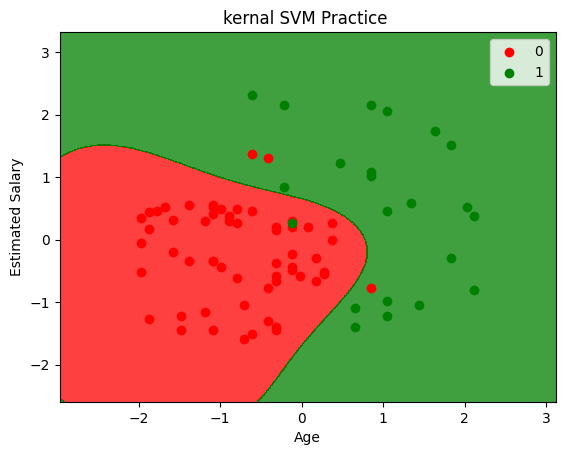

In [56]:
from matplotlib.colors import ListedColormap
# Plotting the decision boundary and test set results
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                         np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title("kernal SVM Practice ")
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show();

# Plot the decision boundary on the test set
plot_decision_boundary(X_test, y_test, title='Kernel SVM (Test set)');

## Now its time to write code in one cell

<ipython-input-61-3f9944b4205c>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


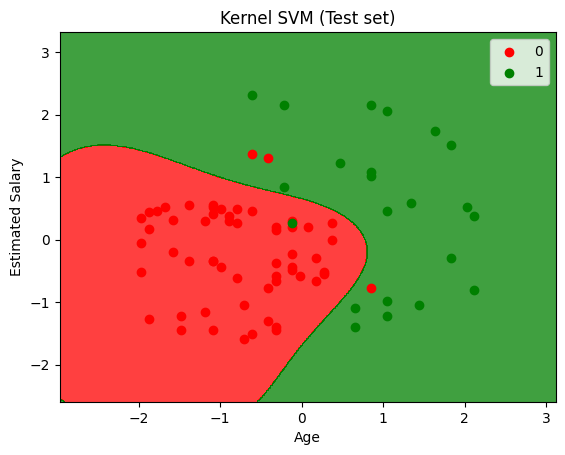

[[55  3]
 [ 1 21]]
accuracy =>  0.95


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing dataset
df = pd.read_csv("/content/car.csv")

# Independent variable
X = df.iloc[:, :-1].values
# Dependent Variable
y = df.iloc[:, -1].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM to the Training set
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)

# Plotting the decision boundary and test set results
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                         np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Plot the decision boundary on the test set
plot_decision_boundary(X_test, y_test, title='Kernel SVM (Test set)')


print(confusion_matrix(y_test, y_pred))
print("accuracy => ", accuracy_score(y_test, y_pred))